In [43]:
# importing packages
import pandas as pd
from datetime import datetime
from ast import literal_eval
import matplotlib.pyplot as plt

## Analysis of Receipts data

In [2]:
receipts = pd.read_json('receipts.json', lines=True)

In [3]:
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


As we can see every column has list of dictonary stored in them, we is not great way to store if we want to perform analysis on them. Let's go ahead and unstack them and divide them into multiple columns.

In [31]:
receipts = receipts.explode('rewardsReceiptItemList')
receipts.reset_index(inplace=True)


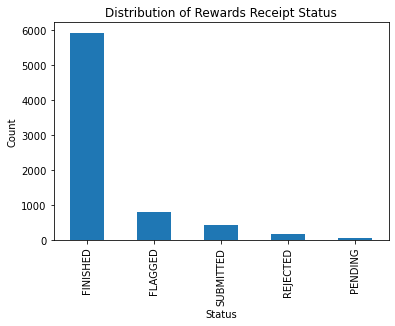

In [45]:
# Counting the status of rewards receipt
receipts['rewardsReceiptStatus'].value_counts().plot(kind='bar')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Rewards Receipt Status')
plt.show()


In [33]:
receipts = receipts.fillna({'rewardsReceiptItemList':'{}'})
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(lambda x:str(x))
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(literal_eval)

In [36]:
receipts_normalize = pd.json_normalize(receipts['rewardsReceiptItemList'],errors='ignore',record_prefix='rewardsReceiptItemList').add_prefix('rewardsReceiptItemList.').add_prefix('rewardsReceiptItemList.')

In [37]:
receipts_updated = pd.merge(receipts, receipts_normalize, left_index=True, right_index=True, how='outer')

In [42]:
receipts_updated.tail()

,index,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,...,rewardsReceiptItemList.rewardsReceiptItemList.itemNumber,rewardsReceiptItemList.rewardsReceiptItemList.originalMetaBriteQuantityPurchased,rewardsReceiptItemList.rewardsReceiptItemList.pointsEarned,rewardsReceiptItemList.rewardsReceiptItemList.targetPrice,rewardsReceiptItemList.rewardsReceiptItemList.competitiveProduct,rewardsReceiptItemList.rewardsReceiptItemList.originalFinalPrice,rewardsReceiptItemList.rewardsReceiptItemList.originalMetaBriteItemPrice,rewardsReceiptItemList.rewardsReceiptItemList.deleted,rewardsReceiptItemList.rewardsReceiptItemList.priceAfterCoupon,rewardsReceiptItemList.rewardsReceiptItemList.metabriteCampaignId
7376,1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7377,1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7378,1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN
7379,1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN
7380,1118,{'$oid': '603c4fea0a7217c72c000389'},NaN,NaN,{'$date': 1614565354962},{'$date': 1614565354962},NaN,{'$date': 1614565354962},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
receipts_updated.shape

(7381, 50)

In [39]:
receipts_updated.isnull().sum()

index                                                                                  0
_id                                                                                    0
bonusPointsEarned                                                                   1401
bonusPointsEarnedReason                                                             1401
createDate                                                                             0
dateScanned                                                                            0
finishedDate                                                                        1411
modifyDate                                                                             0
pointsAwardedDate                                                                   1301
pointsEarned                                                                        1128
purchaseDate                                                                         458
purchasedItemCount   

In [40]:
receipts_updated.describe()

,index,bonusPointsEarned,pointsEarned,purchasedItemCount,totalSpent,rewardsReceiptItemList.rewardsReceiptItemList.quantityPurchased,rewardsReceiptItemList.rewardsReceiptItemList.userFlaggedQuantity,rewardsReceiptItemList.rewardsReceiptItemList.originalMetaBriteQuantityPurchased
count,7381.000000,5980.000000,6253.000000,6897.000000,6946.000000,6767.000000,299.000000,15.000000
mean,422.701937,625.901839,2175.583688,240.764680,1368.577206,1.386139,1.872910,1.200000
std,176.929482,244.395911,2175.733326,221.805453,1588.959342,1.204363,1.314823,0.414039
min,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,318.000000,750.000000,750.000000,93.000000,373.550000,1.000000,1.000000,1.000000
50%,425.000000,750.000000,1447.000000,167.000000,776.790000,1.000000,1.000000,1.000000
75%,462.000000,750.000000,2685.800000,335.000000,1183.100000,1.000000,3.000000,1.000000
max,1118.000000,750.000000,10199.800000,689.000000,4721.950000,17.000000,5.000000,2.000000


More than 50 percent of values are missing from columns such as bonusPointsEarned, bonusPointsEarnedReason,etc, that leads to wrong statistical results.

In [41]:
receipts_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 50 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   index                                                                             7381 non-null   int64  
 1   _id                                                                               7381 non-null   object 
 2   bonusPointsEarned                                                                 5980 non-null   float64
 3   bonusPointsEarnedReason                                                           5980 non-null   object 
 4   createDate                                                                        7381 non-null   object 
 5   dateScanned                                                                       7381 non-null   object 
 6   

The dates are in wrong format, they are stored in dictonary format.

## Analysis of User's data

In [8]:
users = pd.read_json('users.json' , lines = True)

In [9]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


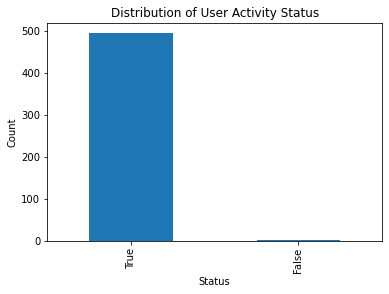

In [48]:
users['active'].value_counts().plot(kind='bar')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of User Activity Status')
plt.show()

In [10]:
def date_converter(x):
  try:
    return(datetime.utcfromtimestamp(int(x['$date'])/1000).strftime('%Y-%m-%d %H:%M:%S'))
  except TypeError:
    return(None)


In [11]:
set().union(*(d.keys() for d in users['_id']))
     

{'$oid'}

In [12]:
set().union(*(d.keys() for d in users['createdDate']))

{'$date'}

In [13]:
set().union(*(d.keys() for d in users.dropna(subset=['lastLogin'])['lastLogin']))

{'$date'}

In [24]:
users['_id'] = users['_id'].apply(lambda x: x['$oid'])


In [14]:

users['createdDate'] = users['createdDate'].apply(lambda x: date_converter(x))
users['lastLogin'] = users['lastLogin'].apply(lambda x: date_converter(x))
     

In [25]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30,2021-01-03 15:25:30,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI


## Analysis of Brands Table

In [16]:
brands = pd.read_json('brands.json', lines = True)

In [17]:
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


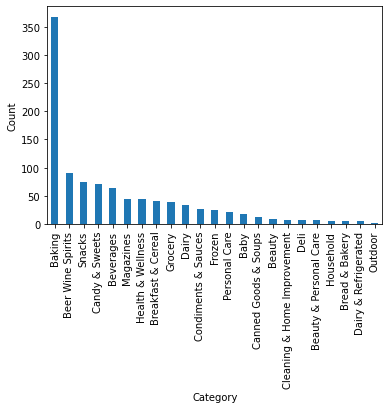

In [49]:
brands['category'].value_counts().plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

In [18]:
set().union(*(d.keys() for d in brands['cpg']))

{'$id', '$ref'}

In [19]:
brands_norm = pd.json_normalize(brands['cpg'])
brands_norm = brands_norm.add_prefix('cpg.')
     


In [20]:
brands_final = pd.merge(brands, brands_norm, left_index=True, right_index=True, how='outer')

In [21]:
brands_final['_id'] = brands_final['_id'].apply(lambda x: x['$oid'])
     

In [22]:
brands_final.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode,cpg.$ref,cpg.$id.$oid
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7


In [23]:
brands_final.isnull().sum()

_id               0
barcode           0
category        155
categoryCode    650
cpg               0
name              0
topBrand        612
brandCode       234
cpg.$ref          0
cpg.$id.$oid      0
dtype: int64

We can see alot of categorycode and brandcode are missing we can have issue when we try to query data from them or perform any kind of analysis to make business decisions.